In [1]:
# 2020년 9월 BC 카드 분석본  

In [2]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("../data/BC_Card_edit.csv")
print(df.info())
df.head()
# 결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519297 entries, 0 to 519296
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준년월        519297 non-null  int64 
 1   품목대분류코드     519297 non-null  int64 
 2   품목대분류명      519297 non-null  object
 3   품목중분류코드     519297 non-null  int64 
 4   품목중분류명      519297 non-null  object
 5   성별          519297 non-null  object
 6   연령          519297 non-null  object
 7   가구생애주기      519297 non-null  object
 8   고객소재지_광역시도  519297 non-null  object
 9   고객소재지_시군구   519297 non-null  object
 10  고객소재지_읍면동   519297 non-null  object
 11  매출금액        519297 non-null  int64 
 12  매출건수        519297 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 51.5+ MB
None


,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [4]:
print(df[df['고객소재지_광역시도'] == '서울특별시'].shape[0])
df = df[df['고객소재지_광역시도'] == '서울특별시']
df['기준년월'].value_counts()

306122


202003    79895
202103    75513
201909    64531
202009    46072
201903    40111
Name: 기준년월, dtype: int64

In [5]:
df_2009 = df[df['기준년월'] == 202009]
print(len(df_2009))

46072


In [6]:
df_2009.head(10)

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
312444,202009,20,여가/스포츠,2013,여행,남성,50대,성인자녀가구,서울특별시,강동구,길동,4204543,85
312455,202009,11,패션잡화,1112,가방,여성,40대,초중고자녀가구,서울특별시,양천구,목동,7081463,72
312456,202009,11,패션잡화,1111,신발,여성,40대,초중고자녀가구,서울특별시,양천구,목동,3520400,72
312462,202009,16,식품,1612,음료,여성,30대,신혼영유아가구,서울특별시,강북구,번동,1998274,89
312466,202009,16,식품,1612,음료,여성,30대,신혼영유아가구,서울특별시,동작구,본동,305109,14
312479,202009,16,식품,1612,음료,여성,30대,신혼영유아가구,서울특별시,마포구,중동,212630,10
312489,202009,20,여가/스포츠,2013,여행,여성,20대,1인가구,서울특별시,도봉구,창동,4730428,99
312490,202009,16,식품,1612,음료,여성,60대 이상,노인가구,서울특별시,도봉구,창동,352290,27
312505,202009,11,패션잡화,1112,가방,여성,30대,신혼영유아가구,서울특별시,구로구,항동,3540612,14
312506,202009,16,식품,1612,음료,여성,30대,신혼영유아가구,서울특별시,구로구,항동,1117577,58


In [7]:
import matplotlib as mpl
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist])) 
mpl.rc('font', family='NanumBarunGothic') 

여성    29895
남성    16177
Name: 성별, dtype: int64


<AxesSubplot:>

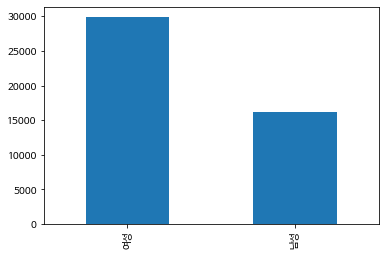

In [8]:
print(df_2009['성별'].value_counts())
df_2009['성별'].value_counts().plot.bar()

6 개
['50대', '20세 미만', '20대', '30대', '60대 이상', '40대']
40대       14517
30대       12465
20대        7762
50대        7608
60대 이상     3295
20세 미만      425
Name: 연령, dtype: int64


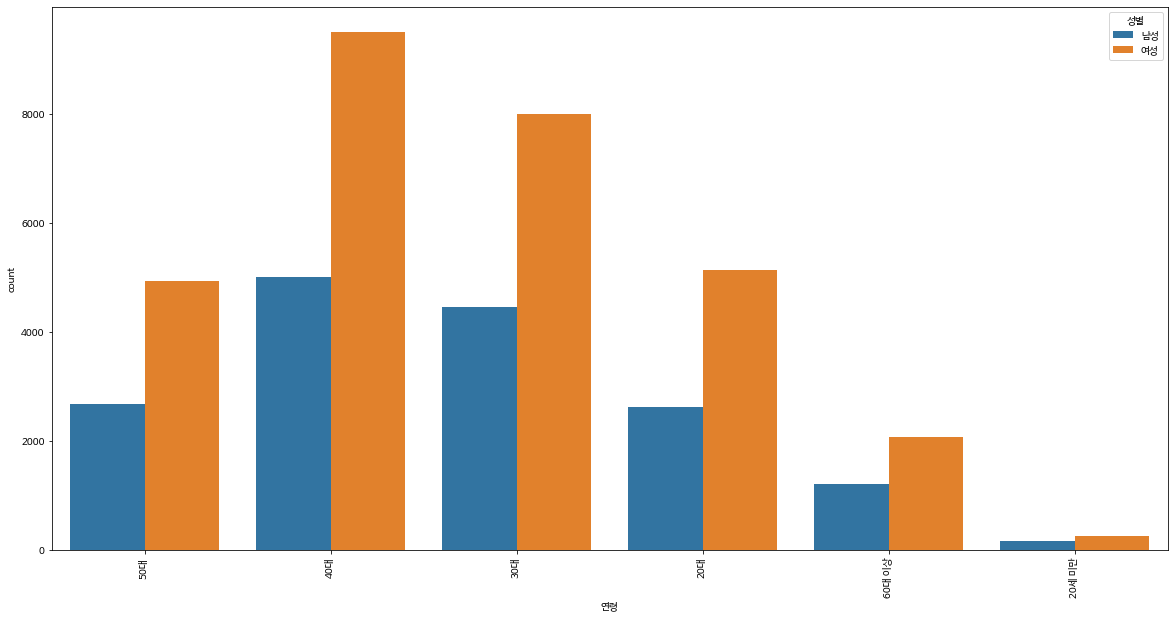

여성 연령 분포 및 순위
40대       9501
30대       7998
20대       5137
50대       4933
60대 이상    2075
20세 미만     251
Name: 연령, dtype: int64
40대       1.0
30대       2.0
20대       3.0
50대       4.0
60대 이상    5.0
20세 미만    6.0
Name: 연령, dtype: float64
남성 연령 분포 및 순위
40대       5016
30대       4467
50대       2675
20대       2625
60대 이상    1220
20세 미만     174
Name: 연령, dtype: int64
40대       1.0
30대       2.0
50대       3.0
20대       4.0
60대 이상    5.0
20세 미만    6.0
Name: 연령, dtype: float64


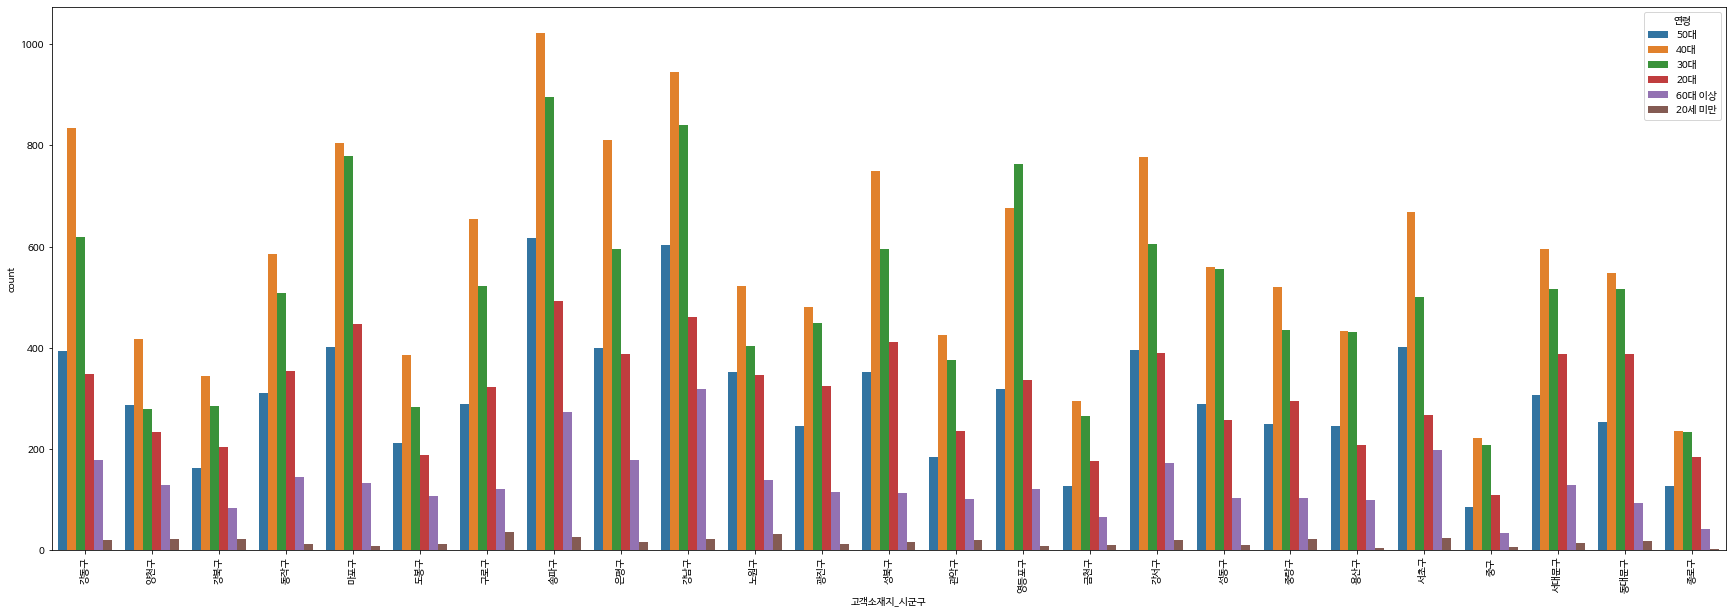

In [9]:
age = list(set(df_2009['연령']))
print(len(age),'개')
print(age)

# 총 연령 분포
print(df_2009['연령'].value_counts())

plt.figure(figsize=(20,10))
sns.countplot(x='연령', hue = '성별', data = df_2009)
plt.xticks(rotation = 90)
plt.show()

df_2009_female =df_2009[df_2009['성별'] == '여성']
print('여성 연령 분포 및 순위')
print(df_2009_female['연령'].value_counts())
print(df_2009_female['연령'].value_counts().rank(ascending = False))

df_2009_male =df_2009[df_2009['성별'] == '남성']
print('남성 연령 분포 및 순위')
print(df_2009_male['연령'].value_counts())
print(df_2009_male['연령'].value_counts().rank(ascending = False))


plt.figure(figsize=(30,10))
sns.countplot(x='고객소재지_시군구', hue = '연령', data = df_2009)
plt.xticks(rotation = 90)
plt.show()

25 개
['성북구', '노원구', '종로구', '동대문구', '강북구', '용산구', '영등포구', '금천구', '도봉구', '양천구', '강남구', '중구', '구로구', '서대문구', '관악구', '마포구', '중랑구', '강서구', '강동구', '은평구', '성동구', '송파구', '서초구', '광진구', '동작구']
송파구     3329
강남구     3191
마포구     2574
강동구     2395
은평구     2387
강서구     2360
성북구     2239
영등포구    2227
서초구     2060
서대문구    1952
구로구     1945
동작구     1915
동대문구    1816
노원구     1794
성동구     1775
광진구     1627
중랑구     1626
용산구     1424
양천구     1370
관악구     1344
도봉구     1189
강북구     1101
금천구      941
종로구      824
중구       667
Name: 고객소재지_시군구, dtype: int64


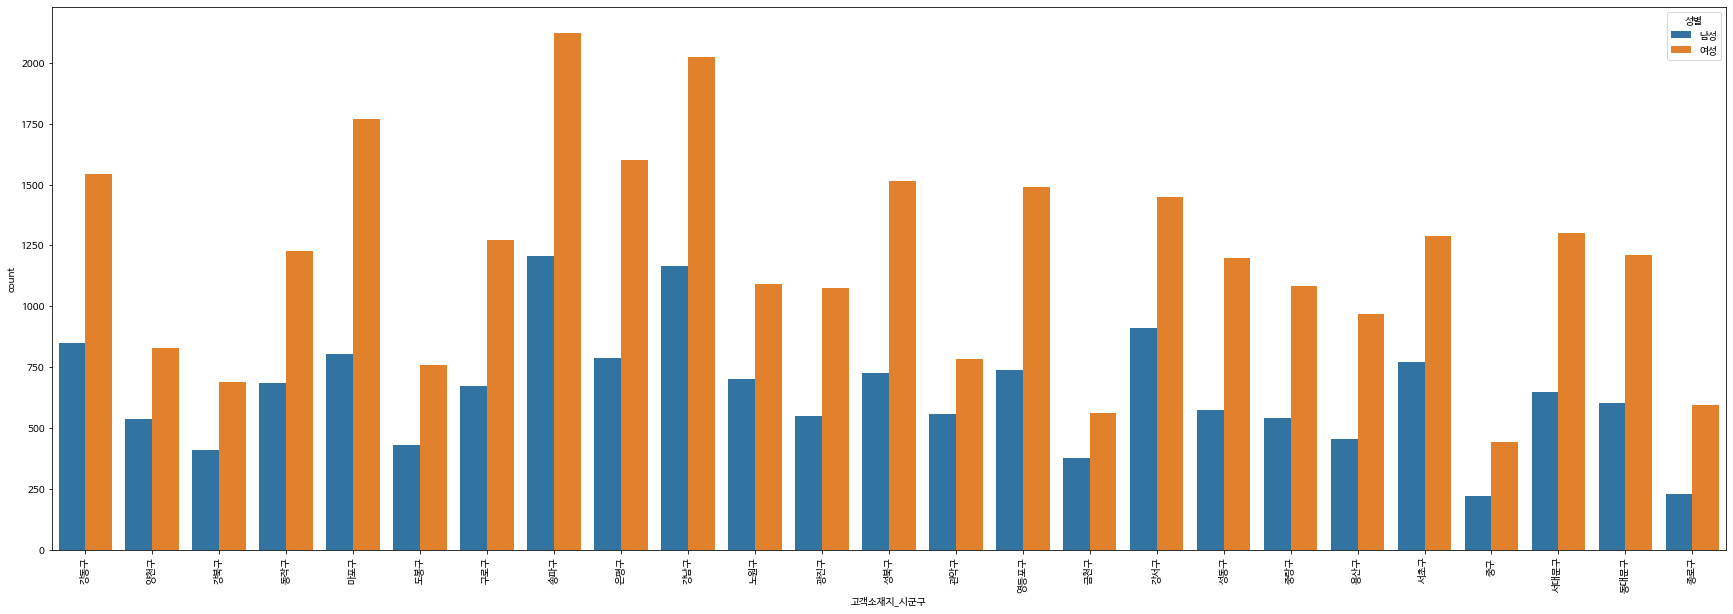

송파구    1.0
강남구    2.0
마포구    3.0
은평구    4.0
강동구    5.0
Name: 고객소재지_시군구, dtype: float64
송파구    1.0
강남구    2.0
강서구    3.0
강동구    4.0
마포구    5.0
Name: 고객소재지_시군구, dtype: float64


In [10]:
sigoongu = list(set(df_2009['고객소재지_시군구']))
print(len(sigoongu),'개')
print(sigoongu)

print(df_2009['고객소재지_시군구'].value_counts()) 

plt.figure(figsize=(30,10))
sns.countplot(x='고객소재지_시군구', hue = '성별', data = df_2009)
plt.xticks(rotation = 90)
plt.show()

print(df_2009_female['고객소재지_시군구'].value_counts().rank(ascending = False).head(5))
print(df_2009_male['고객소재지_시군구'].value_counts().rank(ascending = False).head(5))

5 개
['초중고자녀가구', '1인가구', '신혼영유아가구', '성인자녀가구', '노인가구']
신혼영유아가구    14939
초중고자녀가구     9807
1인가구        9444
성인자녀가구      8587
노인가구        3295
Name: 가구생애주기, dtype: int64


<AxesSubplot:>

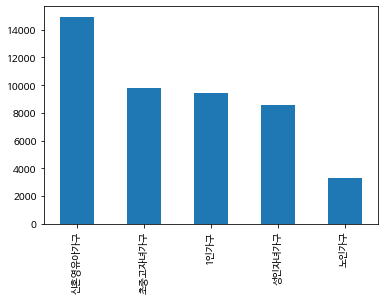

In [11]:
family = list(set(df_2009['가구생애주기']))
print(len(family),'개')
print(family)

print(df_2009['가구생애주기'].value_counts())
df_2009['가구생애주기'].value_counts().plot.bar()

In [12]:
# 각 지역구가 맞는지 판별하기 위한 True/False
iscounty = []
for i in range(len(sigoongu)):
    iscounty.append(df['고객소재지_시군구'] == sigoongu[i])
    
# 각 지역구의 데이터프레임
counties = []
for j in range(len(sigoongu)):
    counties.append(df[iscounty[j]])

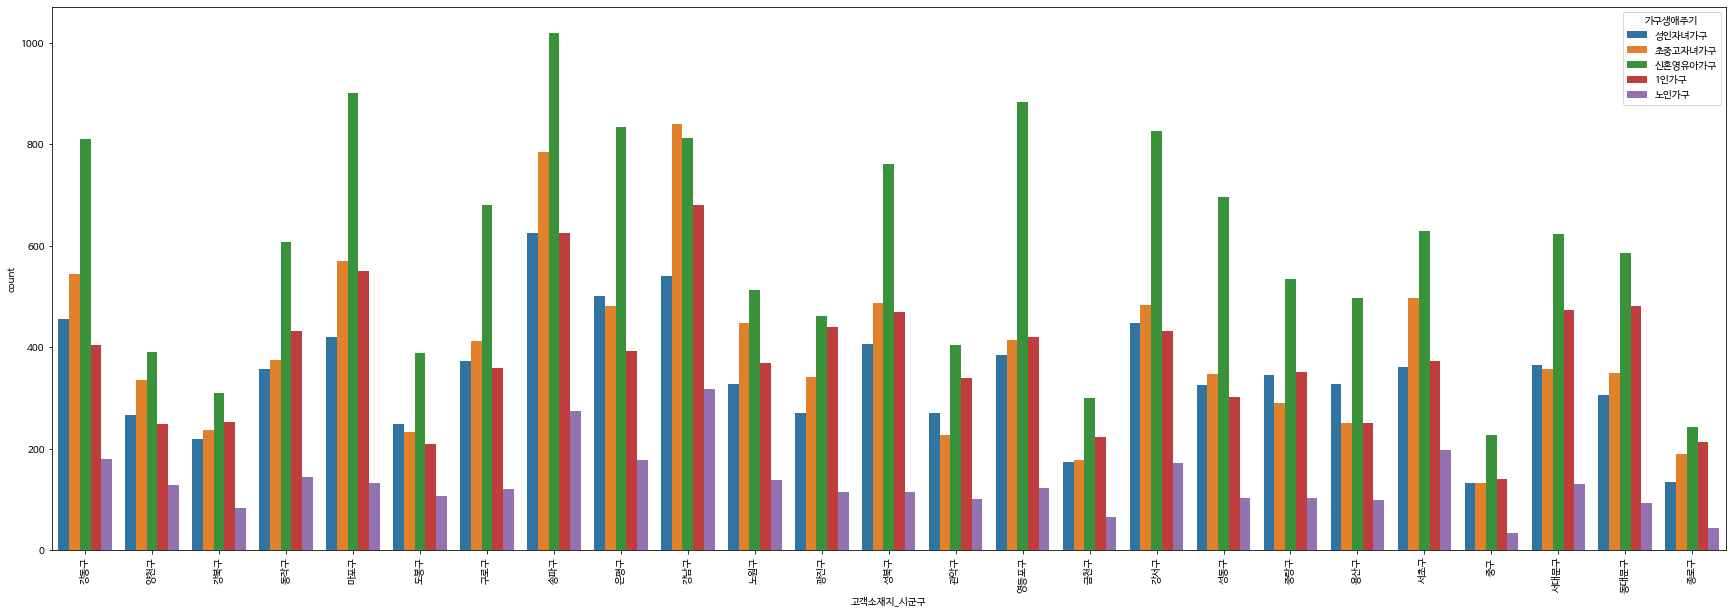

In [13]:
plt.figure(figsize=(30,10))
sns.countplot(x='고객소재지_시군구', hue = '가구생애주기', data = df_2009)
plt.xticks(rotation = 90)
plt.show()

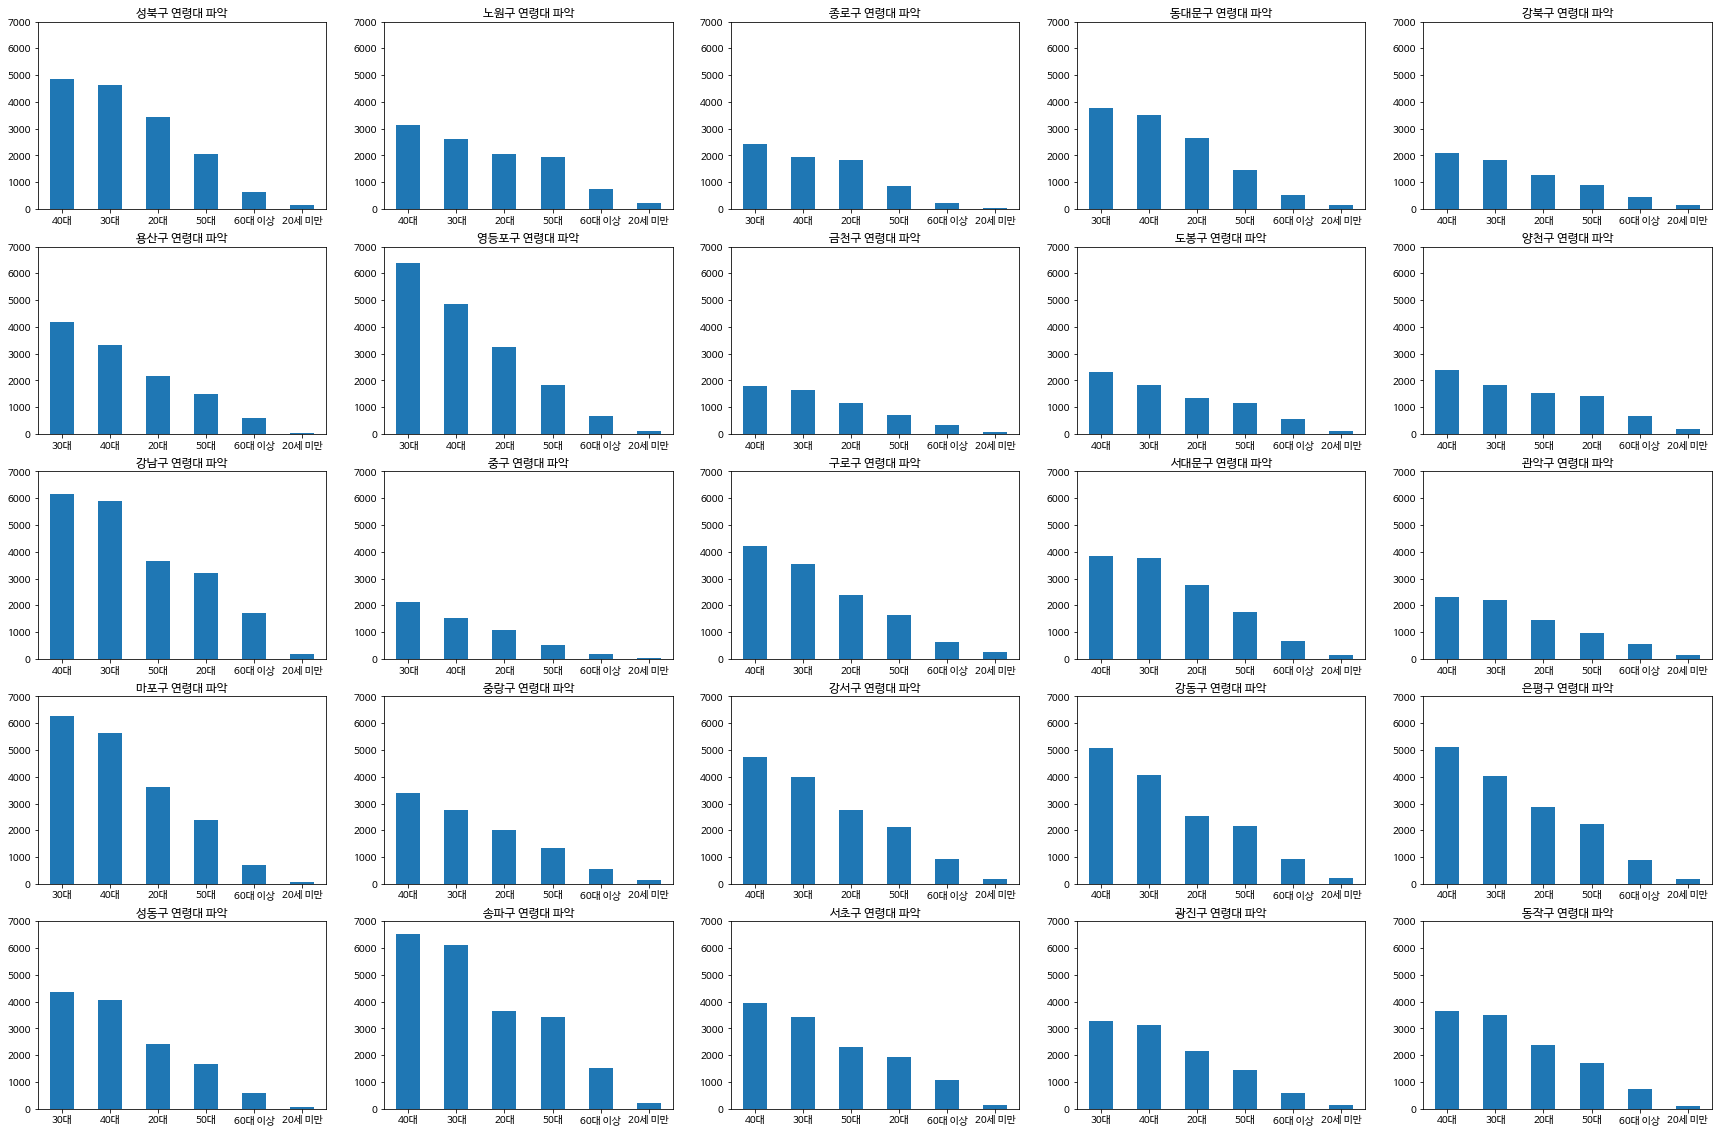

In [14]:
plt.figure(figsize=(30,20))

for i in range(len(sigoongu)):
    plt.subplot(5, 5, i+1)
    counties[i]['연령'].value_counts().plot.bar()
    plt.ylim([0, 7000])
    plt.xticks(rotation=0)
    plt.title(sigoongu[i]+ ' 연령대 파악')

plt.show()

In [15]:
large_category = list(set(df_2009['품목대분류명']))
# print(large_category)

middle_category = list(set(df_2009['품목중분류명']))
# print(middle_category)

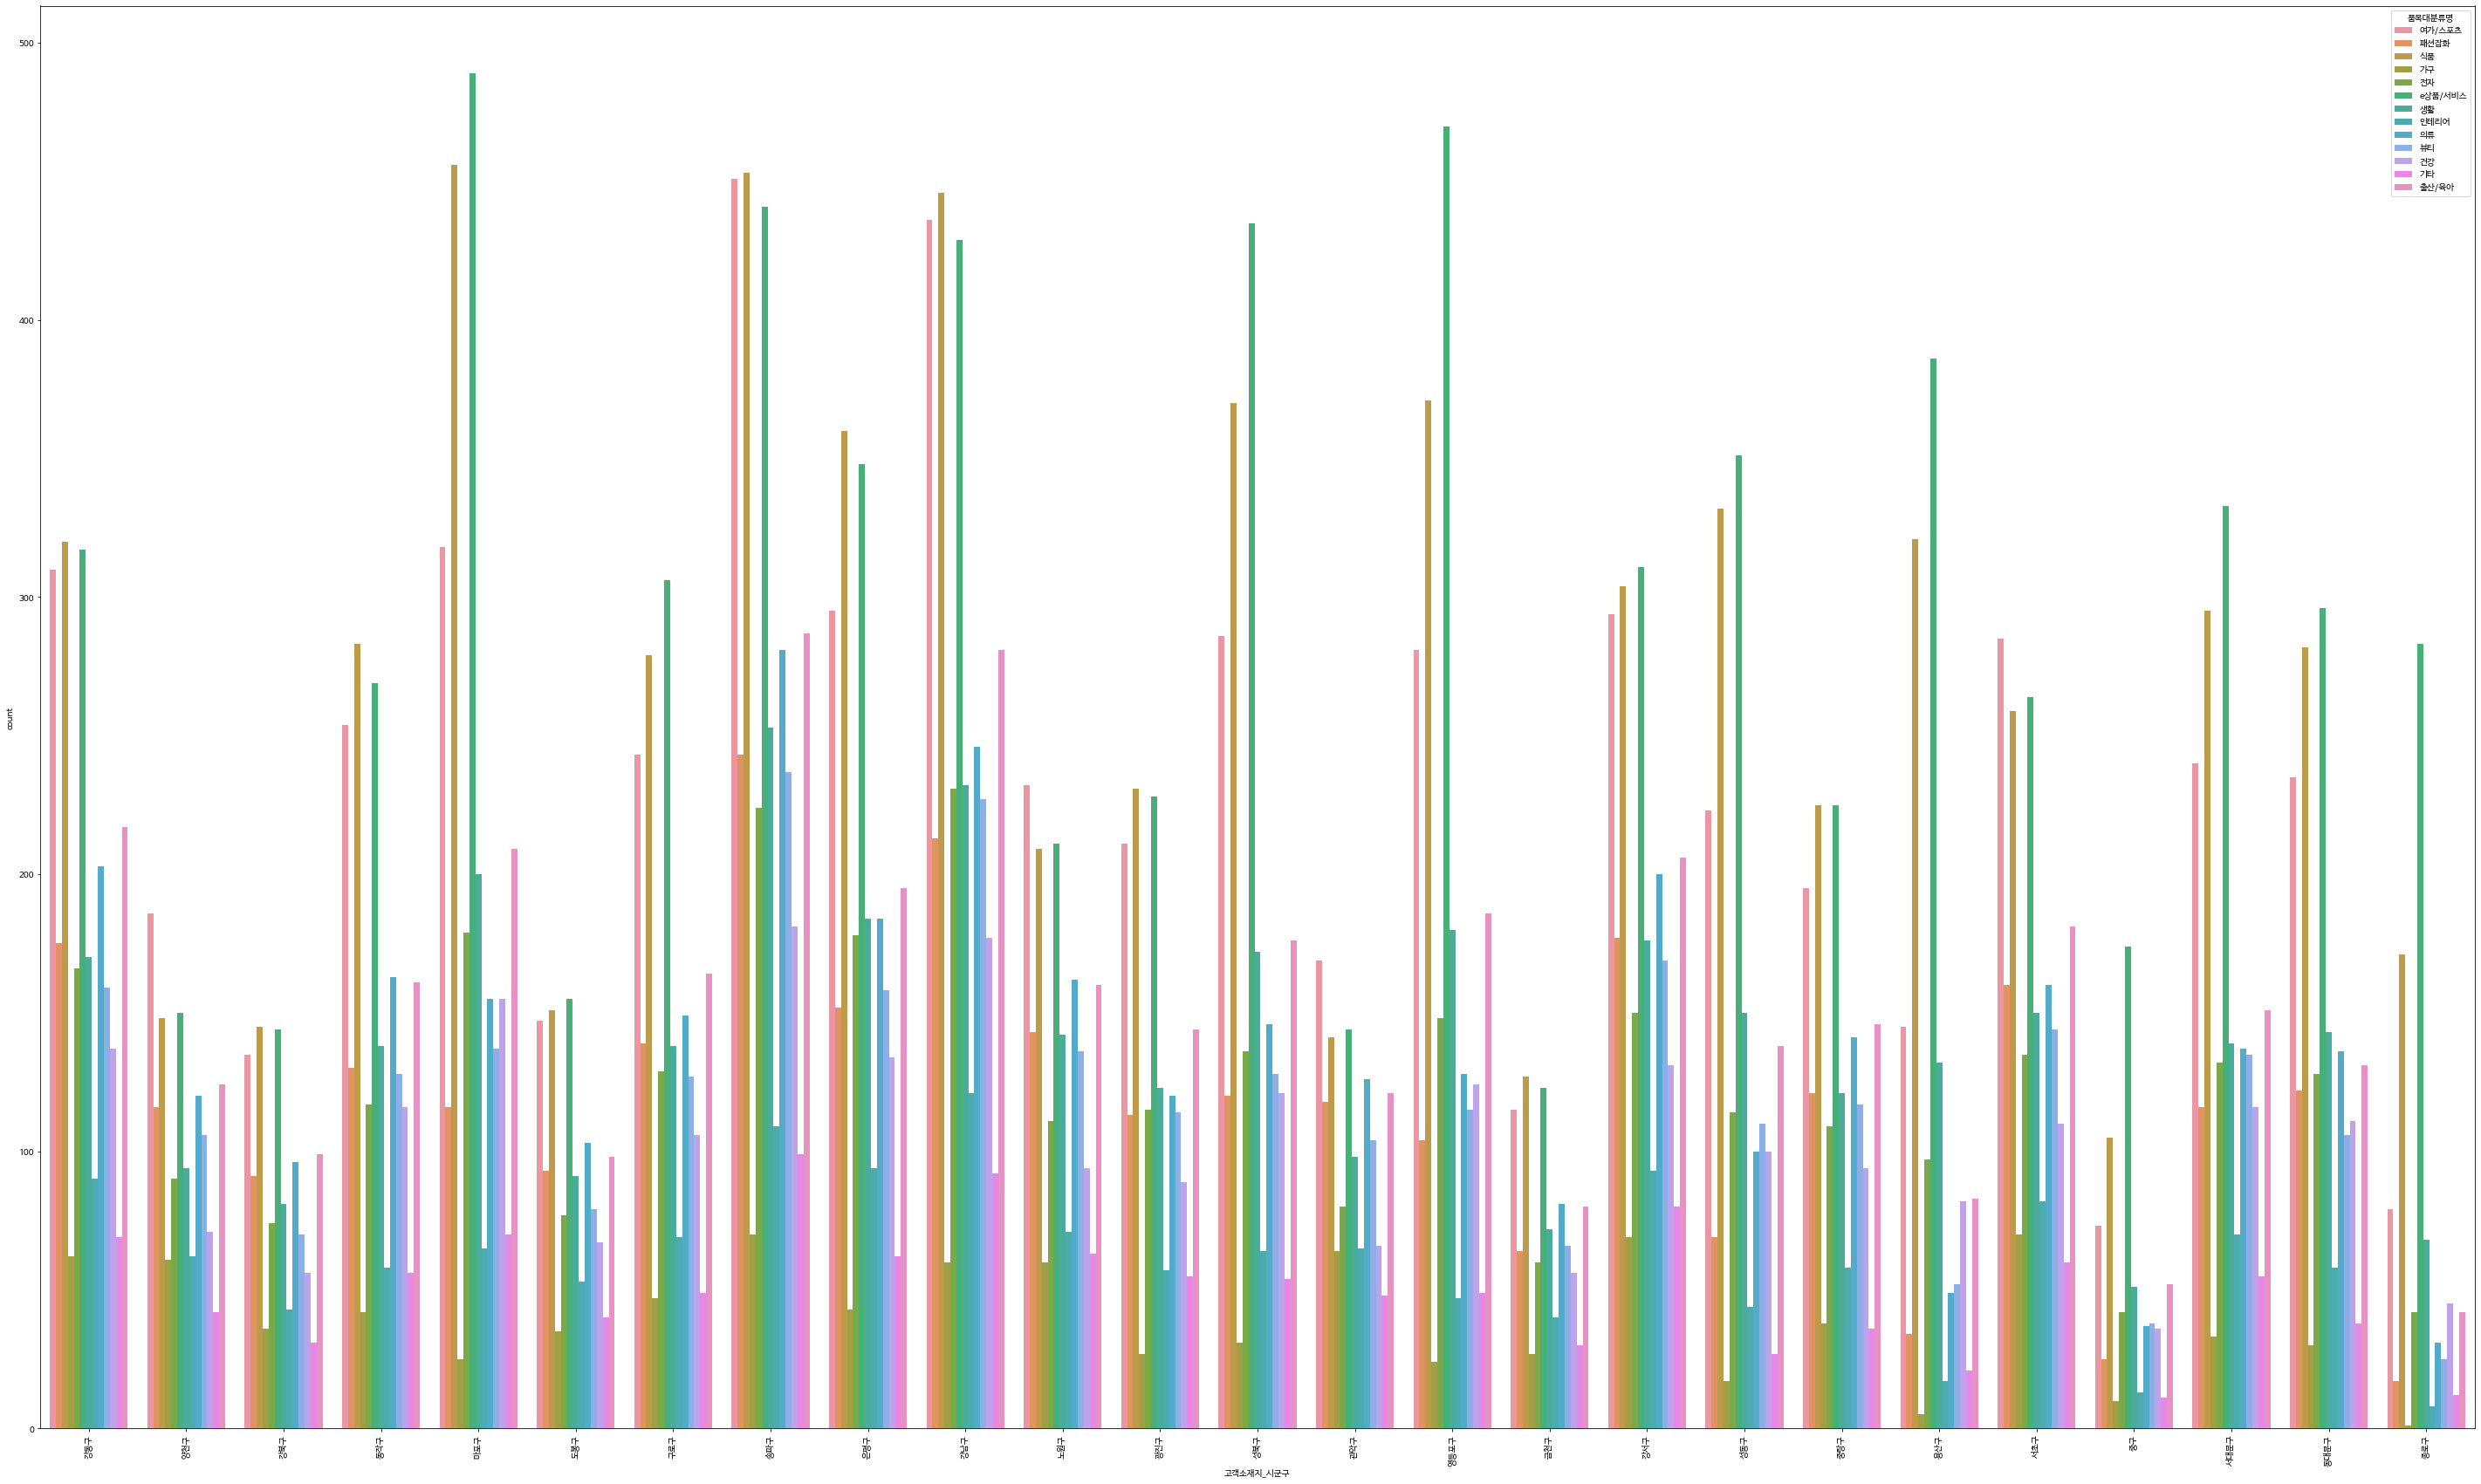

In [16]:
plt.figure(figsize=(50,30))
sns.countplot(x='고객소재지_시군구', hue = '품목대분류명', data = df_2009)
plt.xticks(rotation = 90)
plt.show()

# 여기 부분도 변경 예정
# 각 시군구 별로 매출금액 - 대품목별, 중품목별 매출건수 - 대품목별, 중폼목별
# 총 4개의 그래프 추가 예정

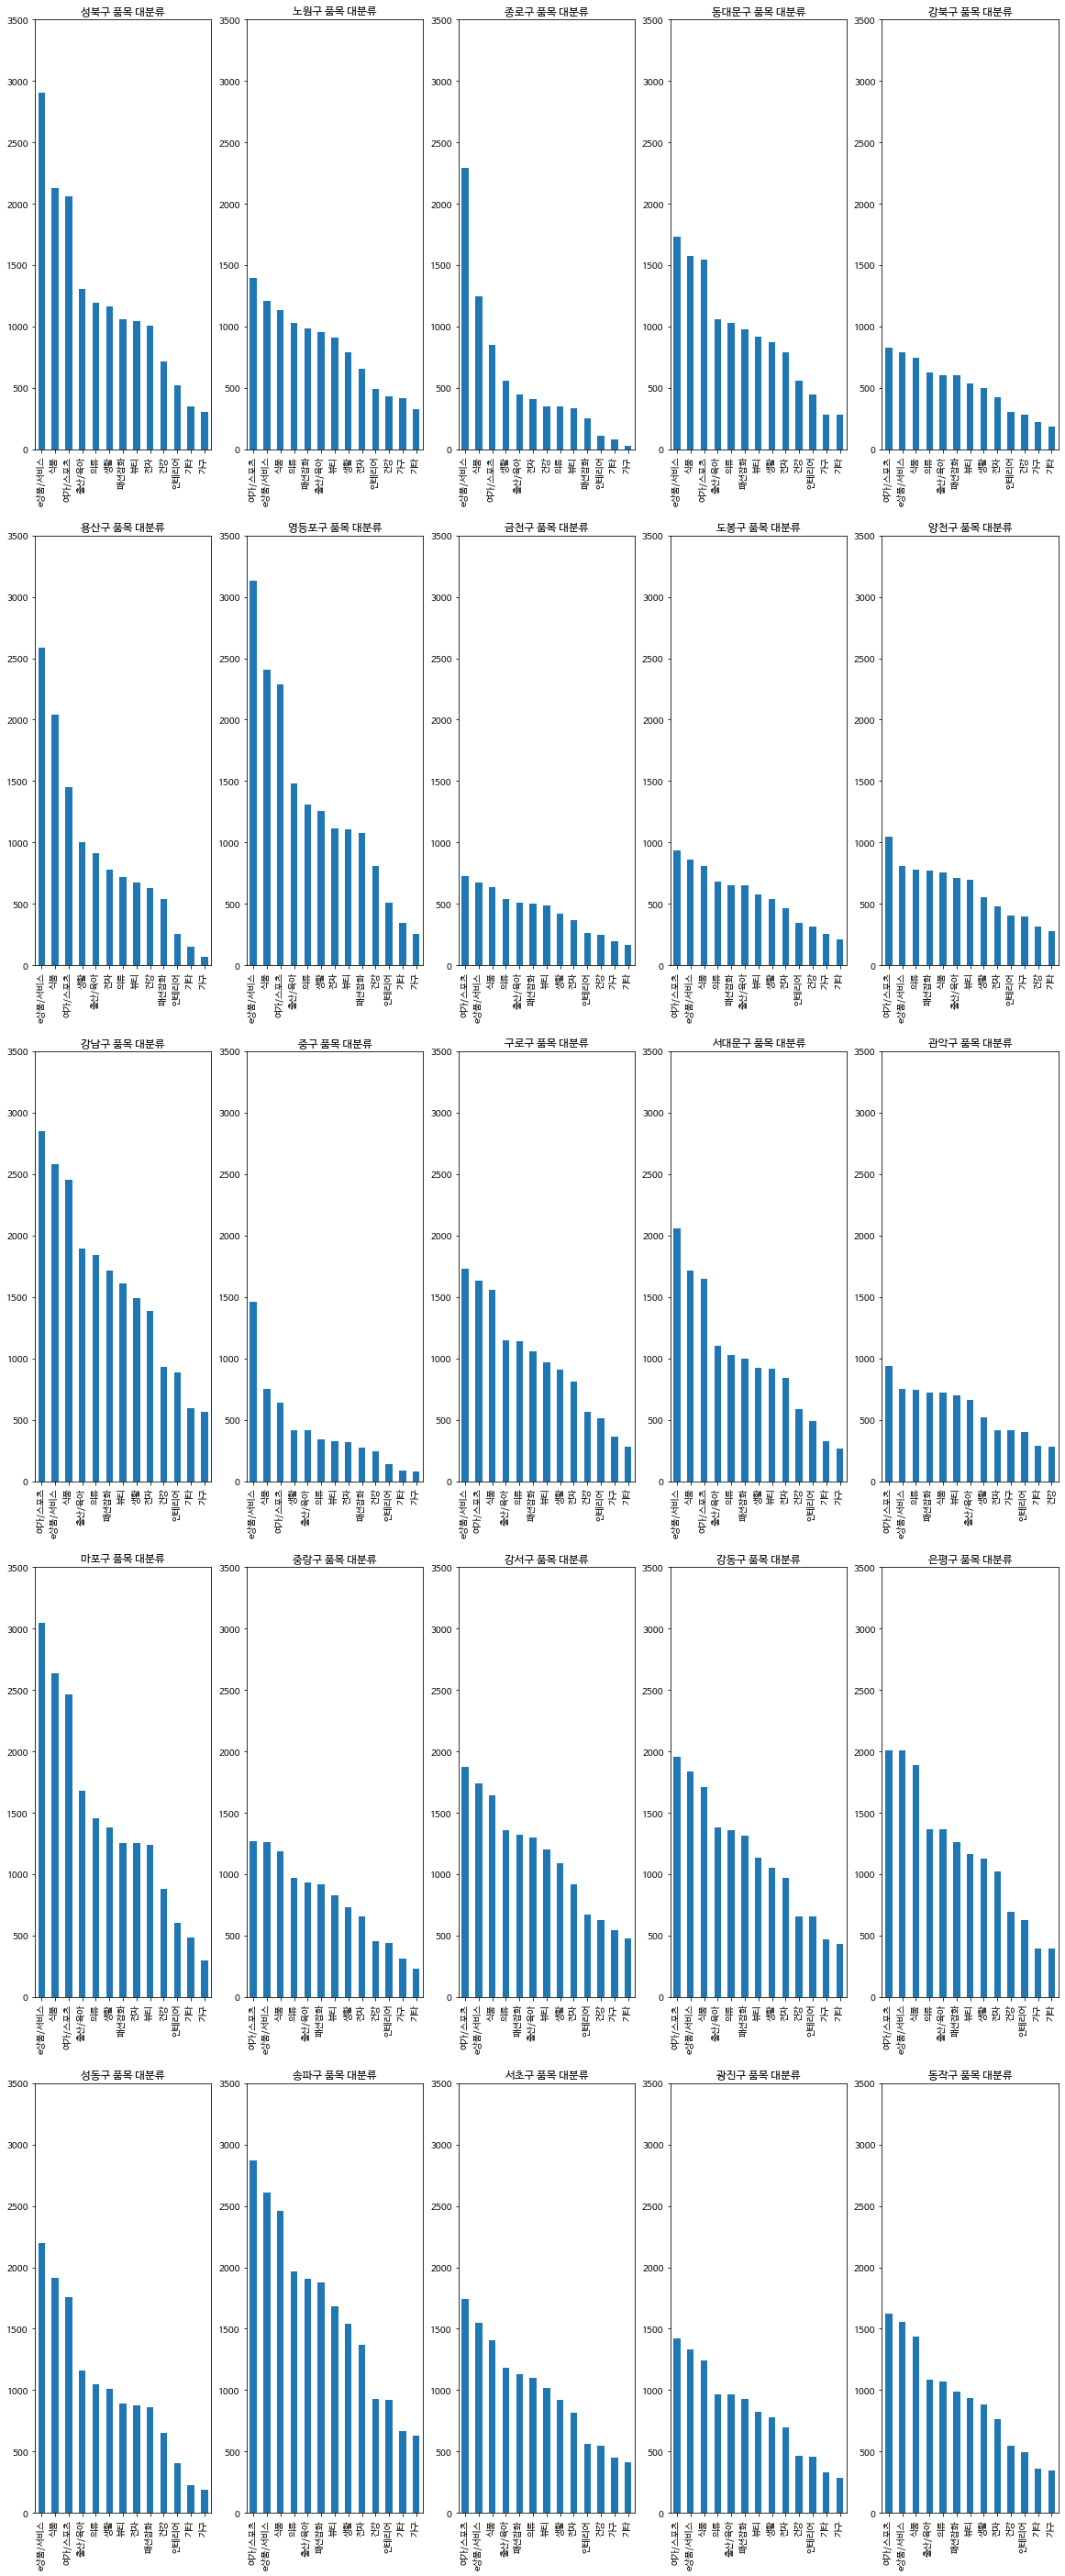

In [17]:
# 지역별 대분류 주문 회수
plt.figure(figsize=(20,50))

for i in range(len(sigoongu)):
    plt.subplot(5, 5, i+1)
    plt.ylim([0, 3500])
    counties[i]['품목대분류명'].value_counts().plot.bar()
    plt.title(sigoongu[i]+ ' 품목 대분류')

plt.show()

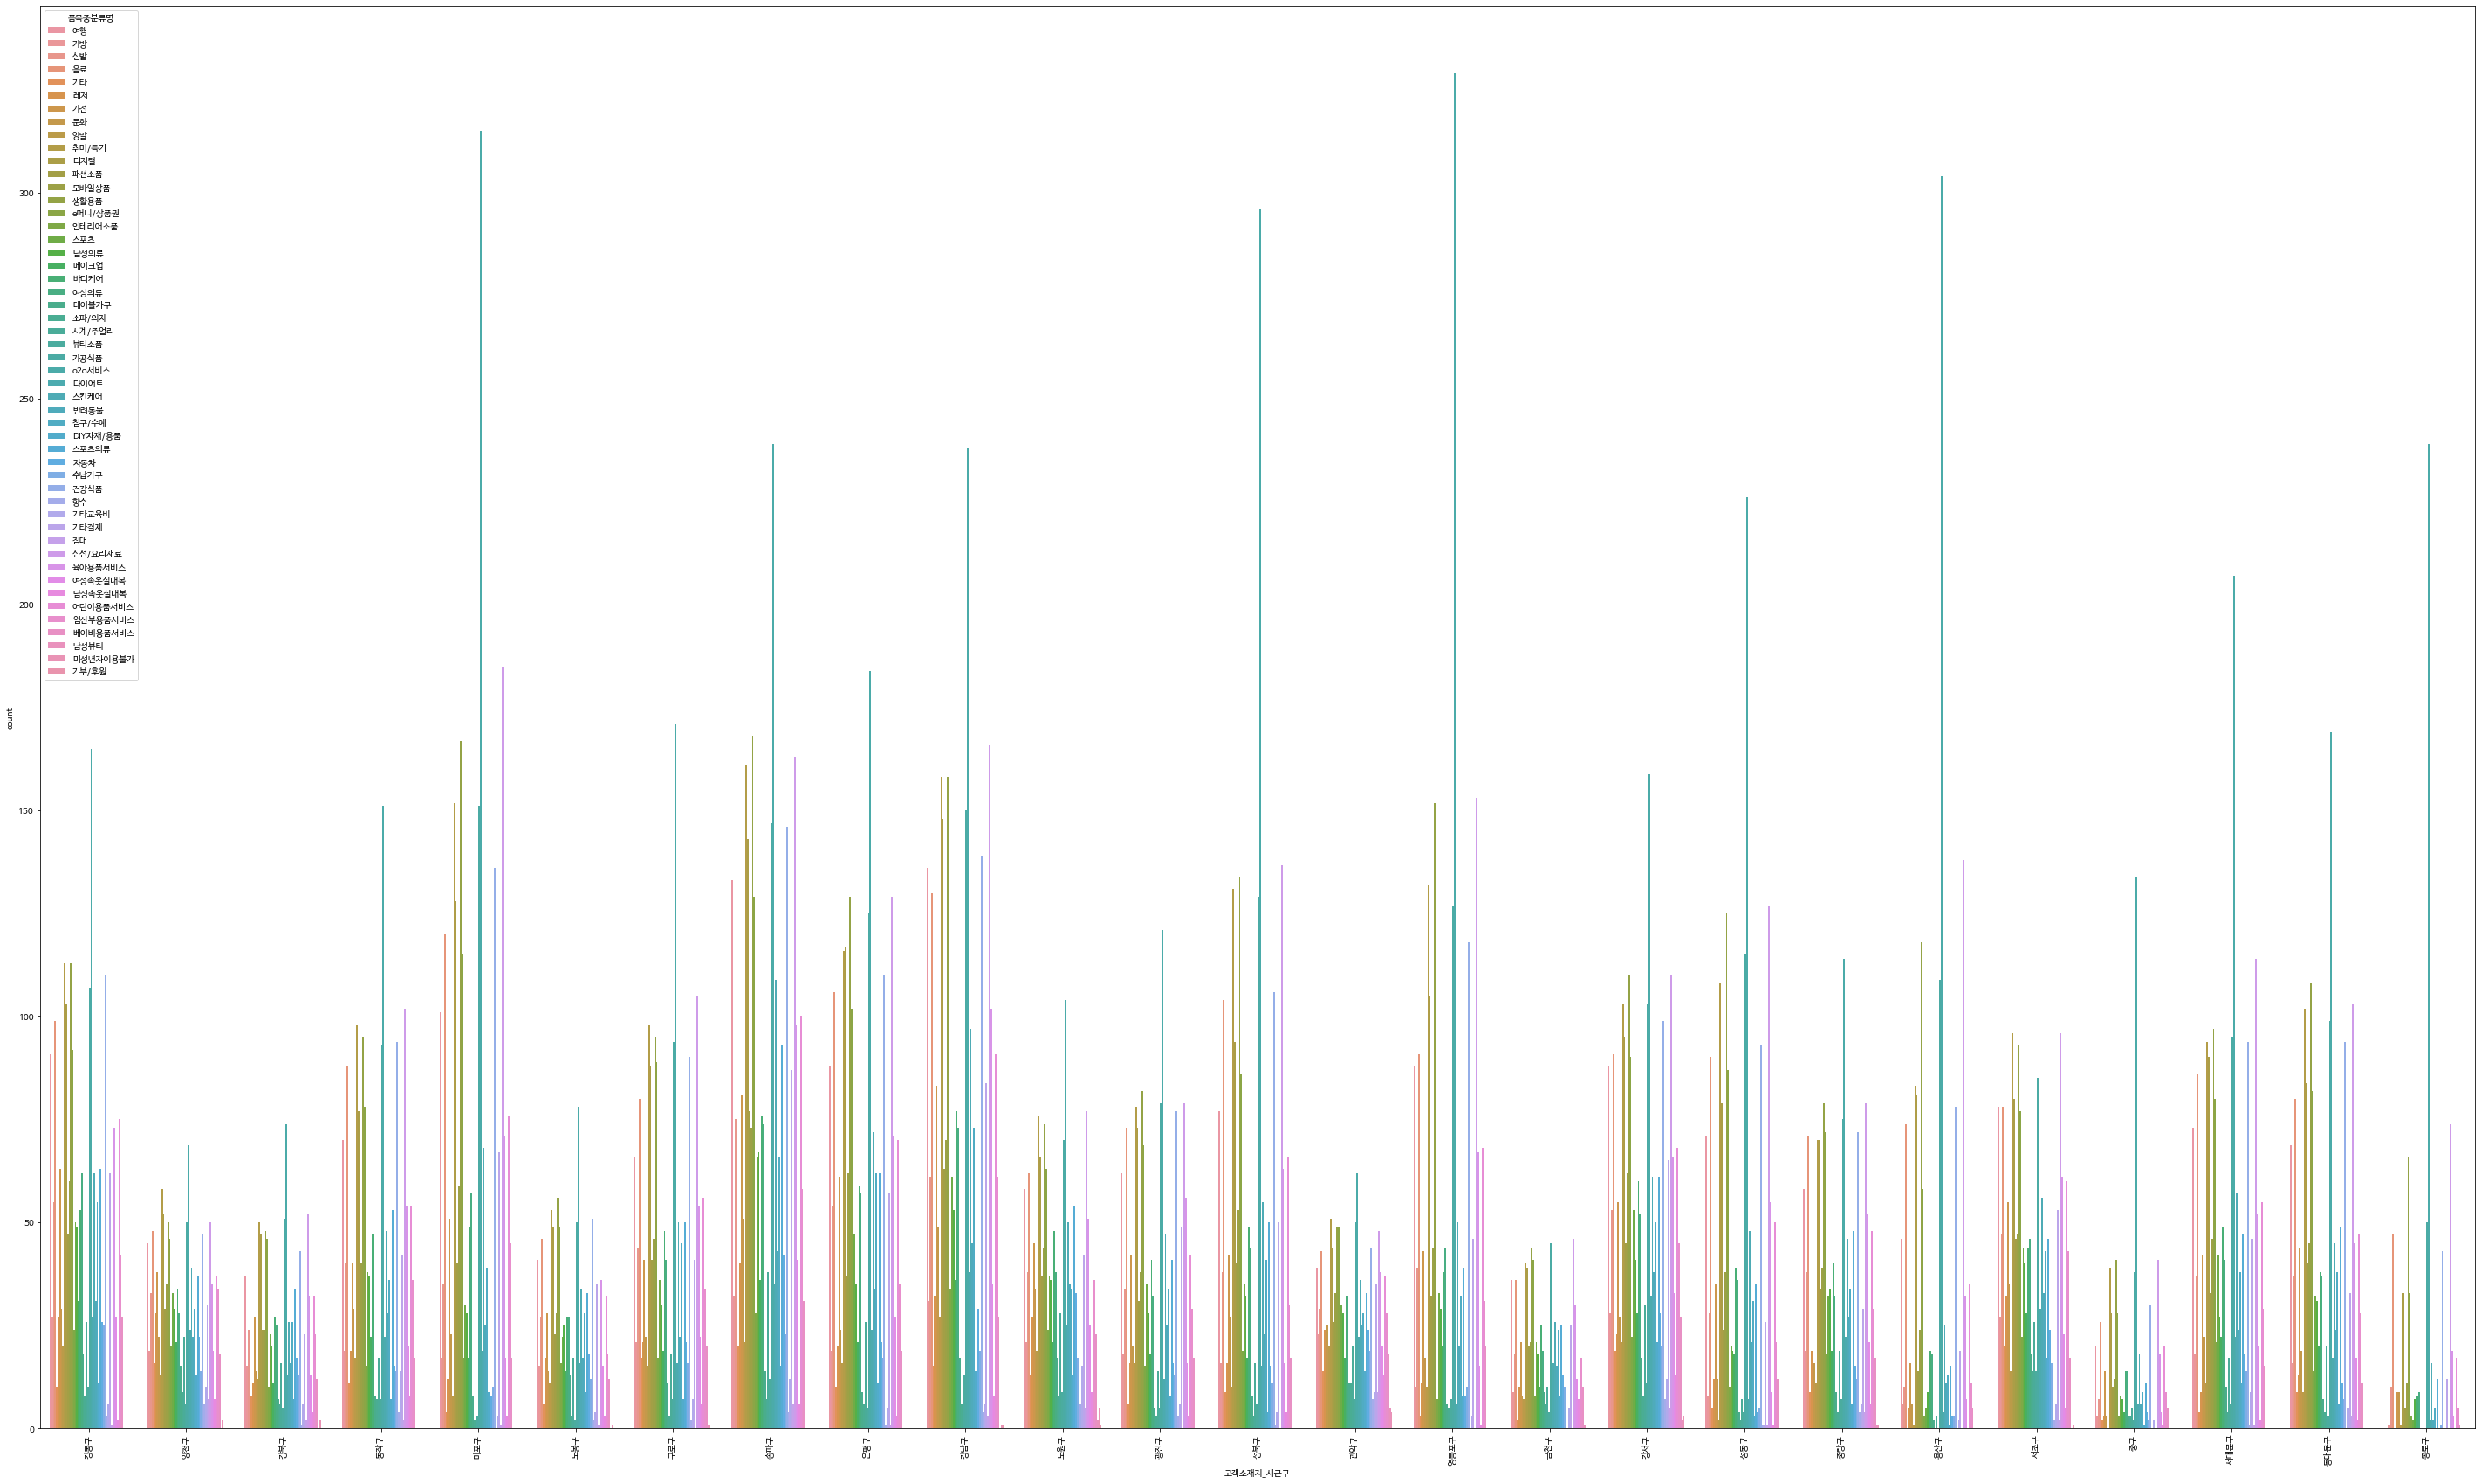

In [18]:
plt.figure(figsize=(50,30))
sns.countplot(x='고객소재지_시군구', hue = '품목중분류명', data = df_2009)
plt.xticks(rotation = 90)
plt.show()

In [19]:
# 지역별 중분류 주문 회수
plt.figure(figsize=(200,150))

for i in range(len(sigoongu)):
    
    plt.subplot(5, 5, i+1)
    plt.ylim([0, 2000])
    counties[i]['품목중분류명'].value_counts().plot.bar()
    plt.title(sigoongu[i]+ ' 품목 중분류')

plt.show()

고객소재지_시군구
강남구     12520293899
강동구      6981422792
강북구      4089970714
강서구      9401676385
관악구      9022382179
광진구      5522828142
구로구      6125753284
금천구      3309295645
노원구      7972459398
도봉구      3987798775
동대문구     4921688749
동작구      6273633404
마포구      5873532551
서대문구     5792290013
서초구      9293117103
성동구      4094471560
성북구      5681943317
송파구     11797766561
양천구      7942937302
영등포구     5658732282
용산구      3184075532
은평구      6731466060
종로구      1457114399
중구       1662646854
중랑구      4902936674
Name: 매출금액, dtype: int64


<AxesSubplot:xlabel='고객소재지_시군구'>

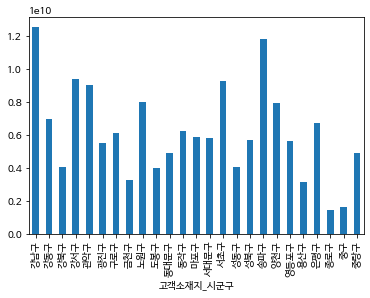

In [20]:
df_2009_매출금액합 = df_2009.groupby('고객소재지_시군구')['매출금액'].sum()
print(df_2009_매출금액합)
df_2009_매출금액합.plot.bar()

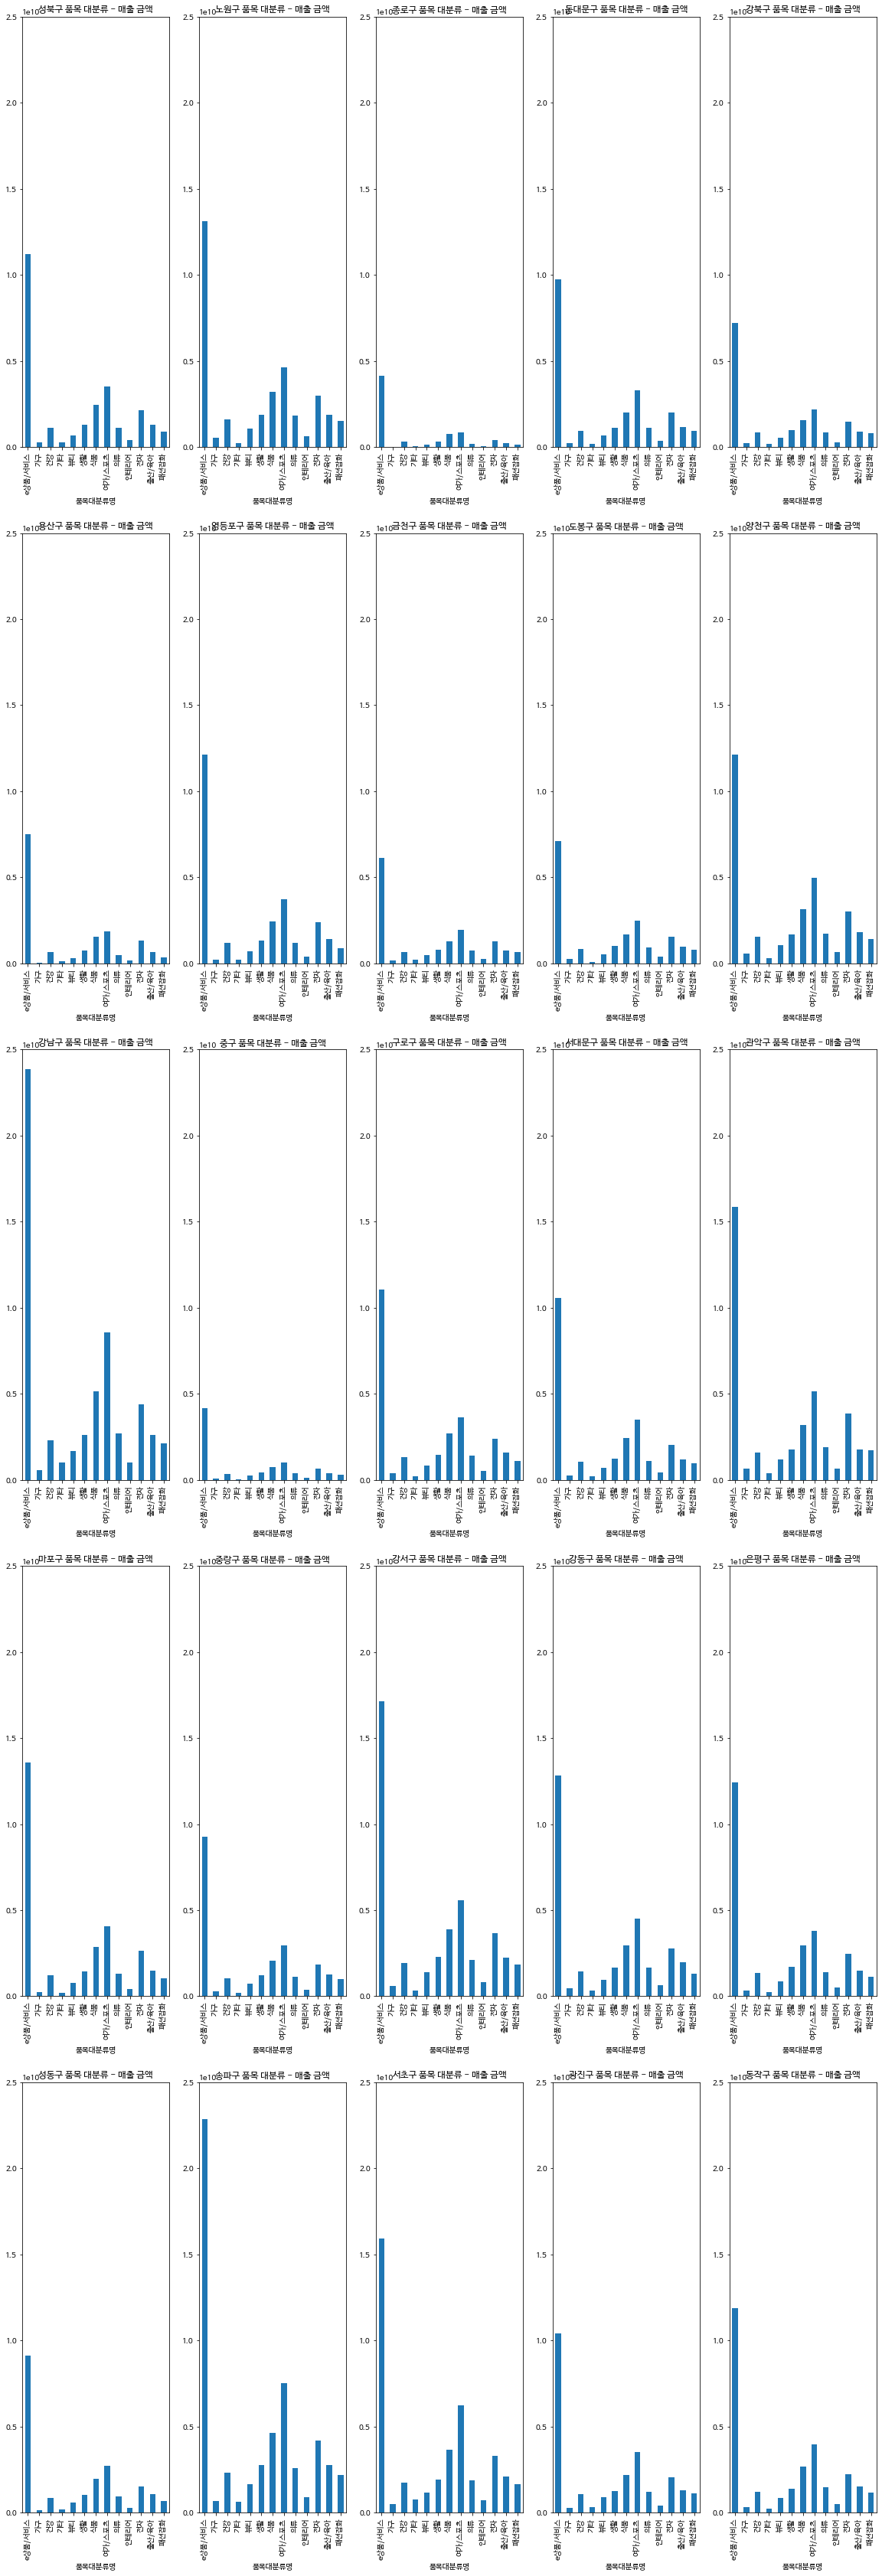

In [21]:
# 지역별 대품목 분류 - 매출 금액

plt.figure(figsize=(20,60))
for i in range(len(sigoongu)):
    plt.subplot(5, 5, i+1)
    plt.ylim([0, 25000000000])
    counties[i].groupby('품목대분류명')['매출금액'].sum().plot.bar()
    plt.title(sigoongu[i]+ ' 품목 대분류 - 매출 금액')

plt.show()

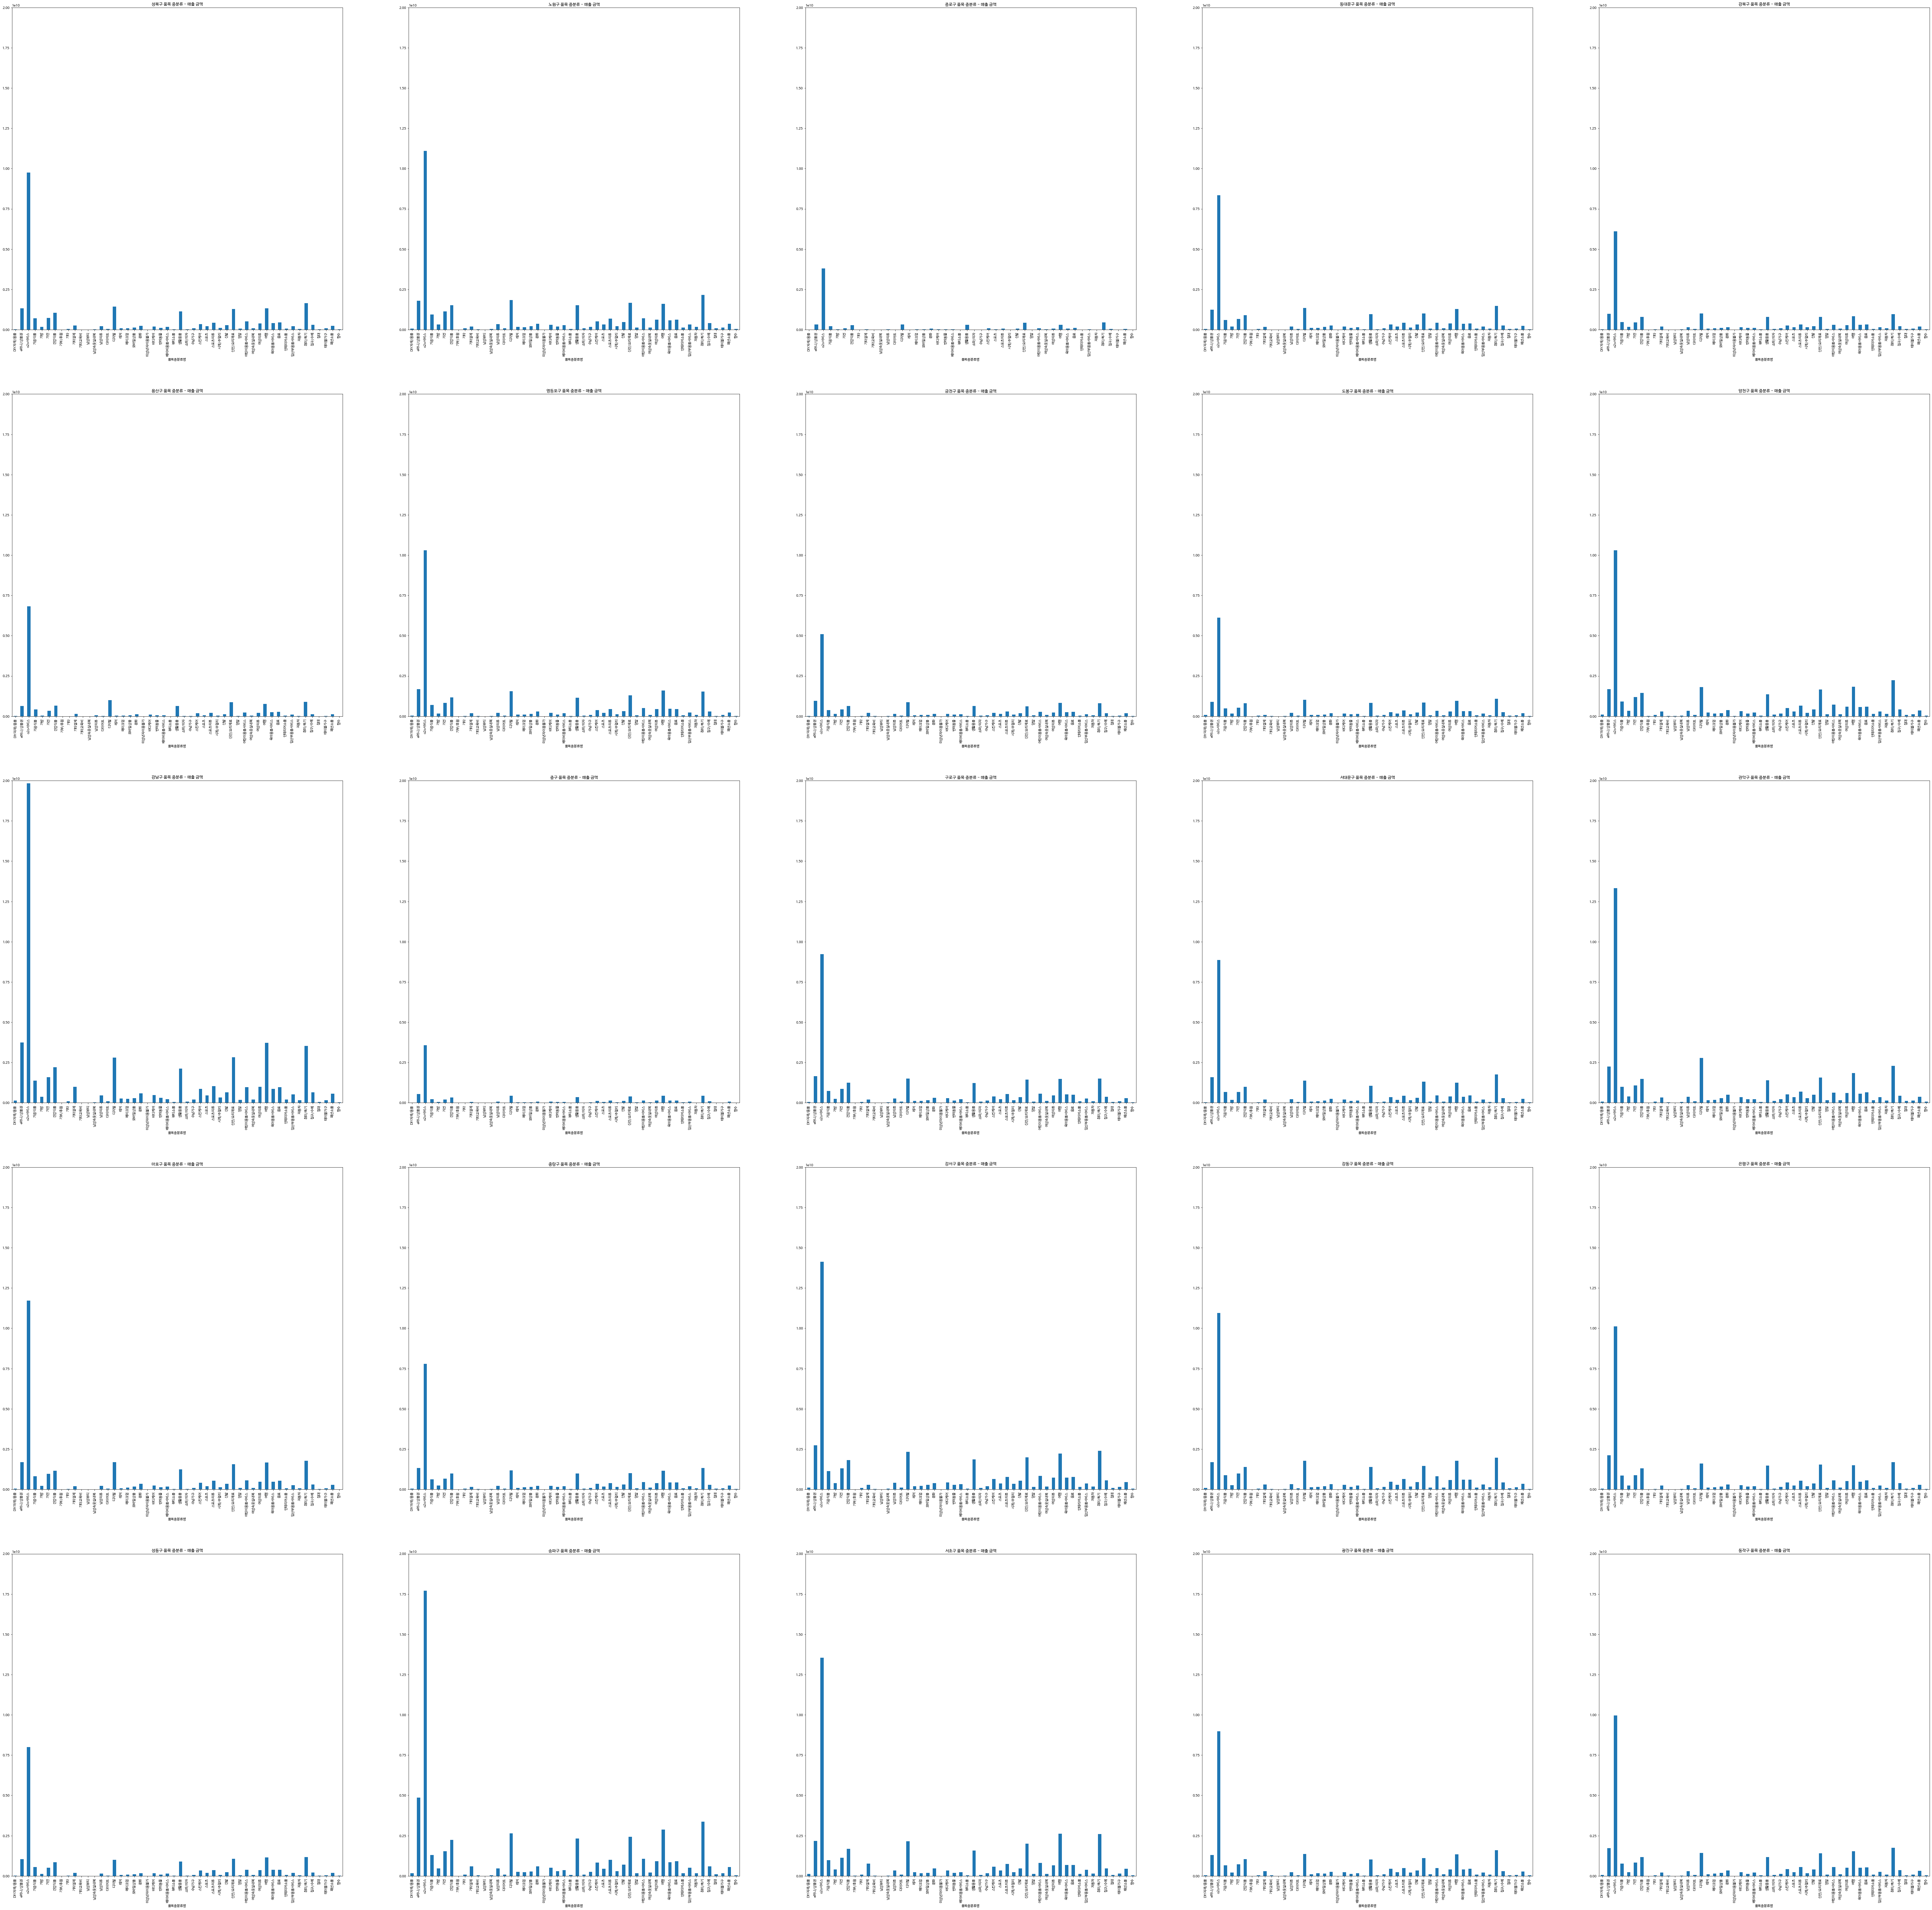

In [22]:
# 지역별 중품목 분류 - 매출 금액

plt.figure(figsize=(100,100))
for i in range(len(sigoongu)):
    plt.subplot(5, 5, i+1)
    plt.ylim([0, 20000000000])
    counties[i].groupby('품목중분류명')['매출금액'].sum().plot.bar()
    plt.title(sigoongu[i]+ ' 품목 중분류 - 매출 금액')

plt.show()

고객소재지_시군구
강남구     224012
강동구     159808
강북구      98499
강서구     214264
관악구     209825
광진구     125992
구로구     142503
금천구      76969
노원구     185647
도봉구      92639
동대문구    118584
동작구     140903
마포구     132617
서대문구    125760
서초구     160894
성동구      87656
성북구     130329
송파구     235542
양천구     160110
영등포구    125369
용산구      61541
은평구     153894
종로구      34212
중구       36636
중랑구     119095
Name: 매출건수, dtype: int64


<AxesSubplot:xlabel='고객소재지_시군구'>

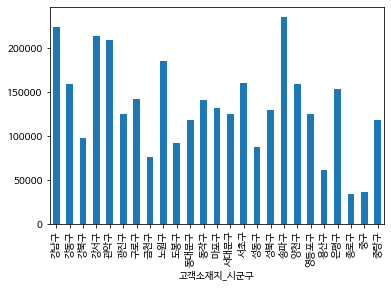

In [23]:
df_2009_매출건수합 = df_2009.groupby('고객소재지_시군구')['매출건수'].sum()
print(df_2009_매출건수합)
df_2009_매출건수합.plot.bar()

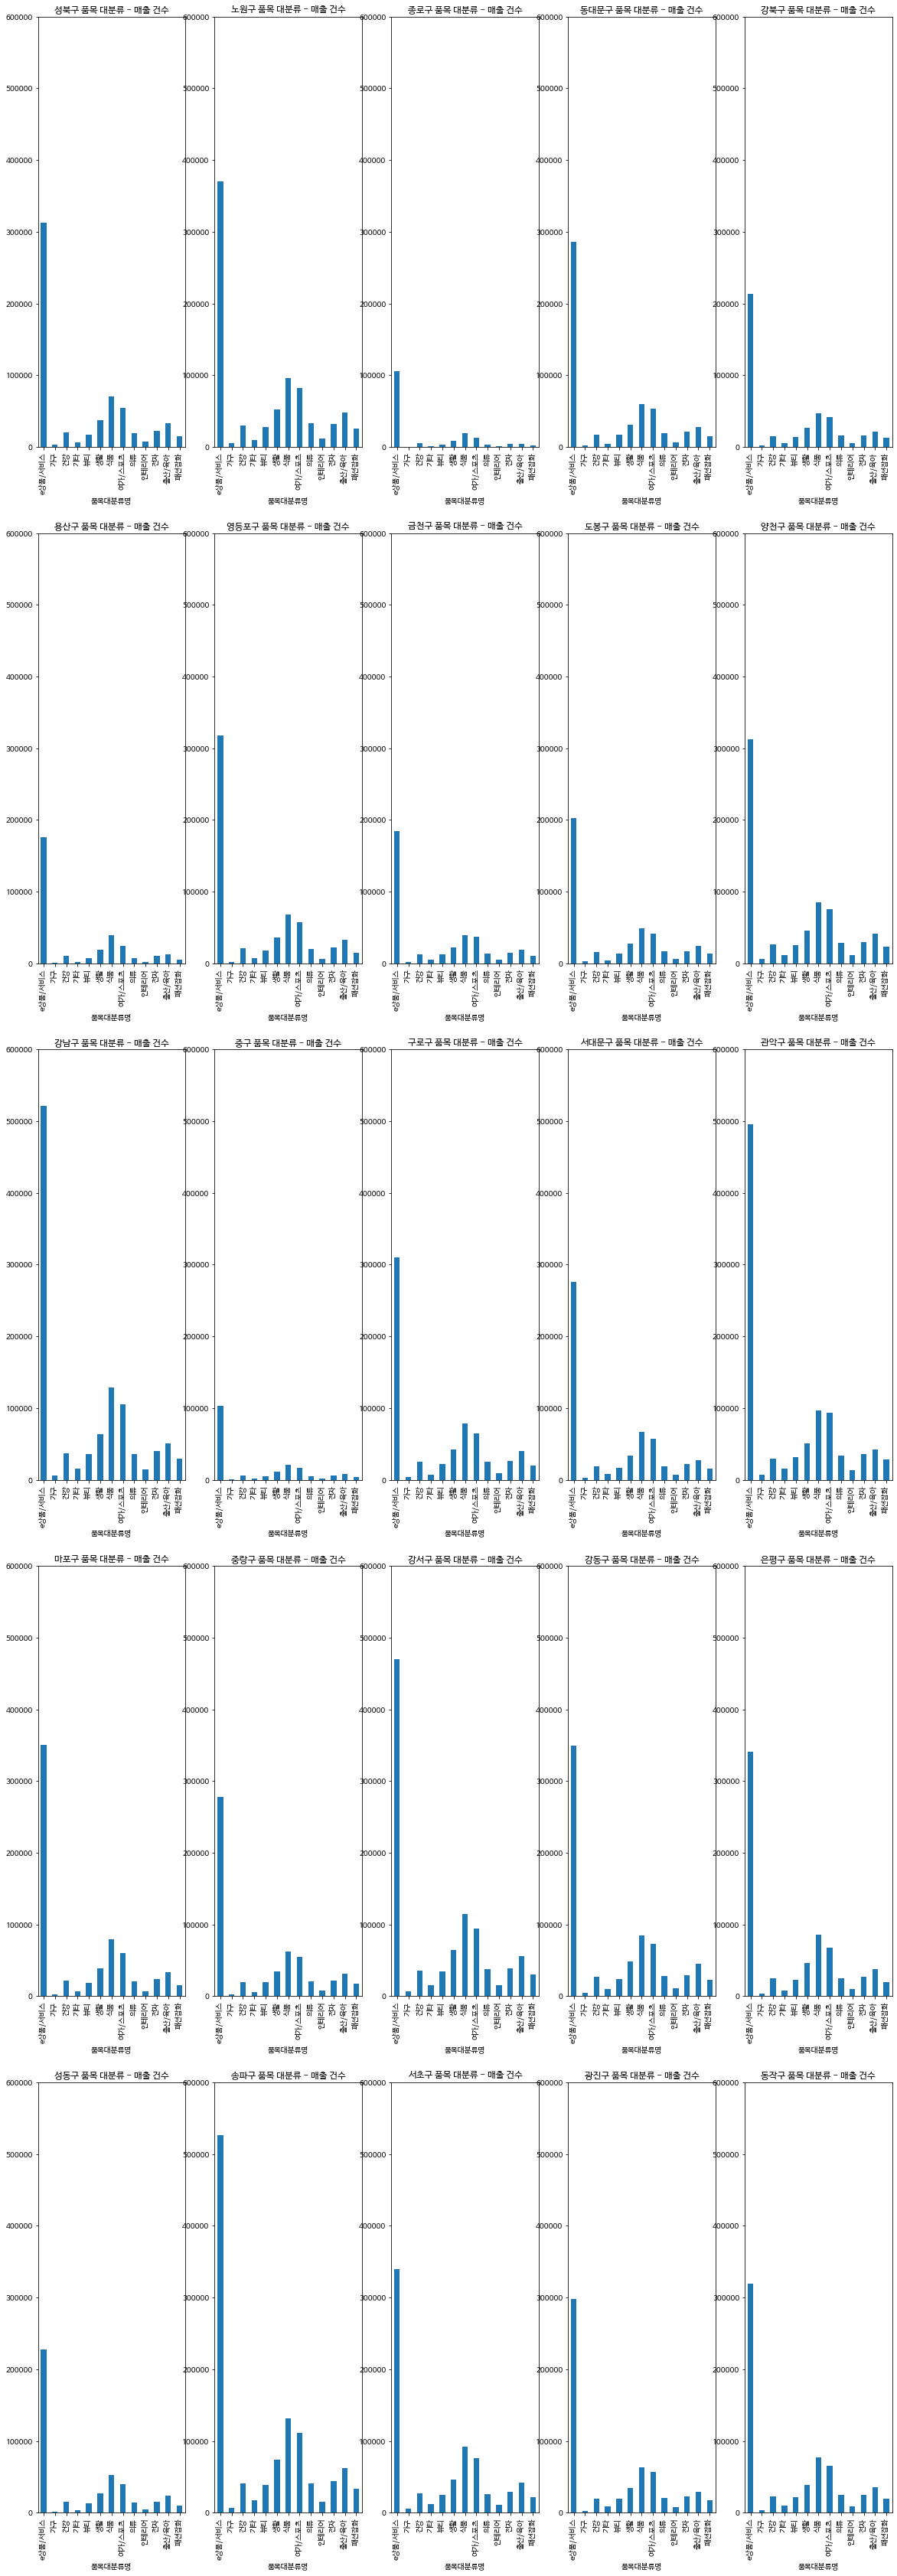

In [24]:
# 지역별 대품목 분류 - 매출 건수

plt.figure(figsize=(20,60))
for i in range(len(sigoongu)):
    plt.subplot(5, 5, i+1)
    plt.ylim([0, 600000])
    counties[i].groupby('품목대분류명')['매출건수'].sum().plot.bar()
    plt.title(sigoongu[i]+ ' 품목 대분류 - 매출 건수')

plt.show()

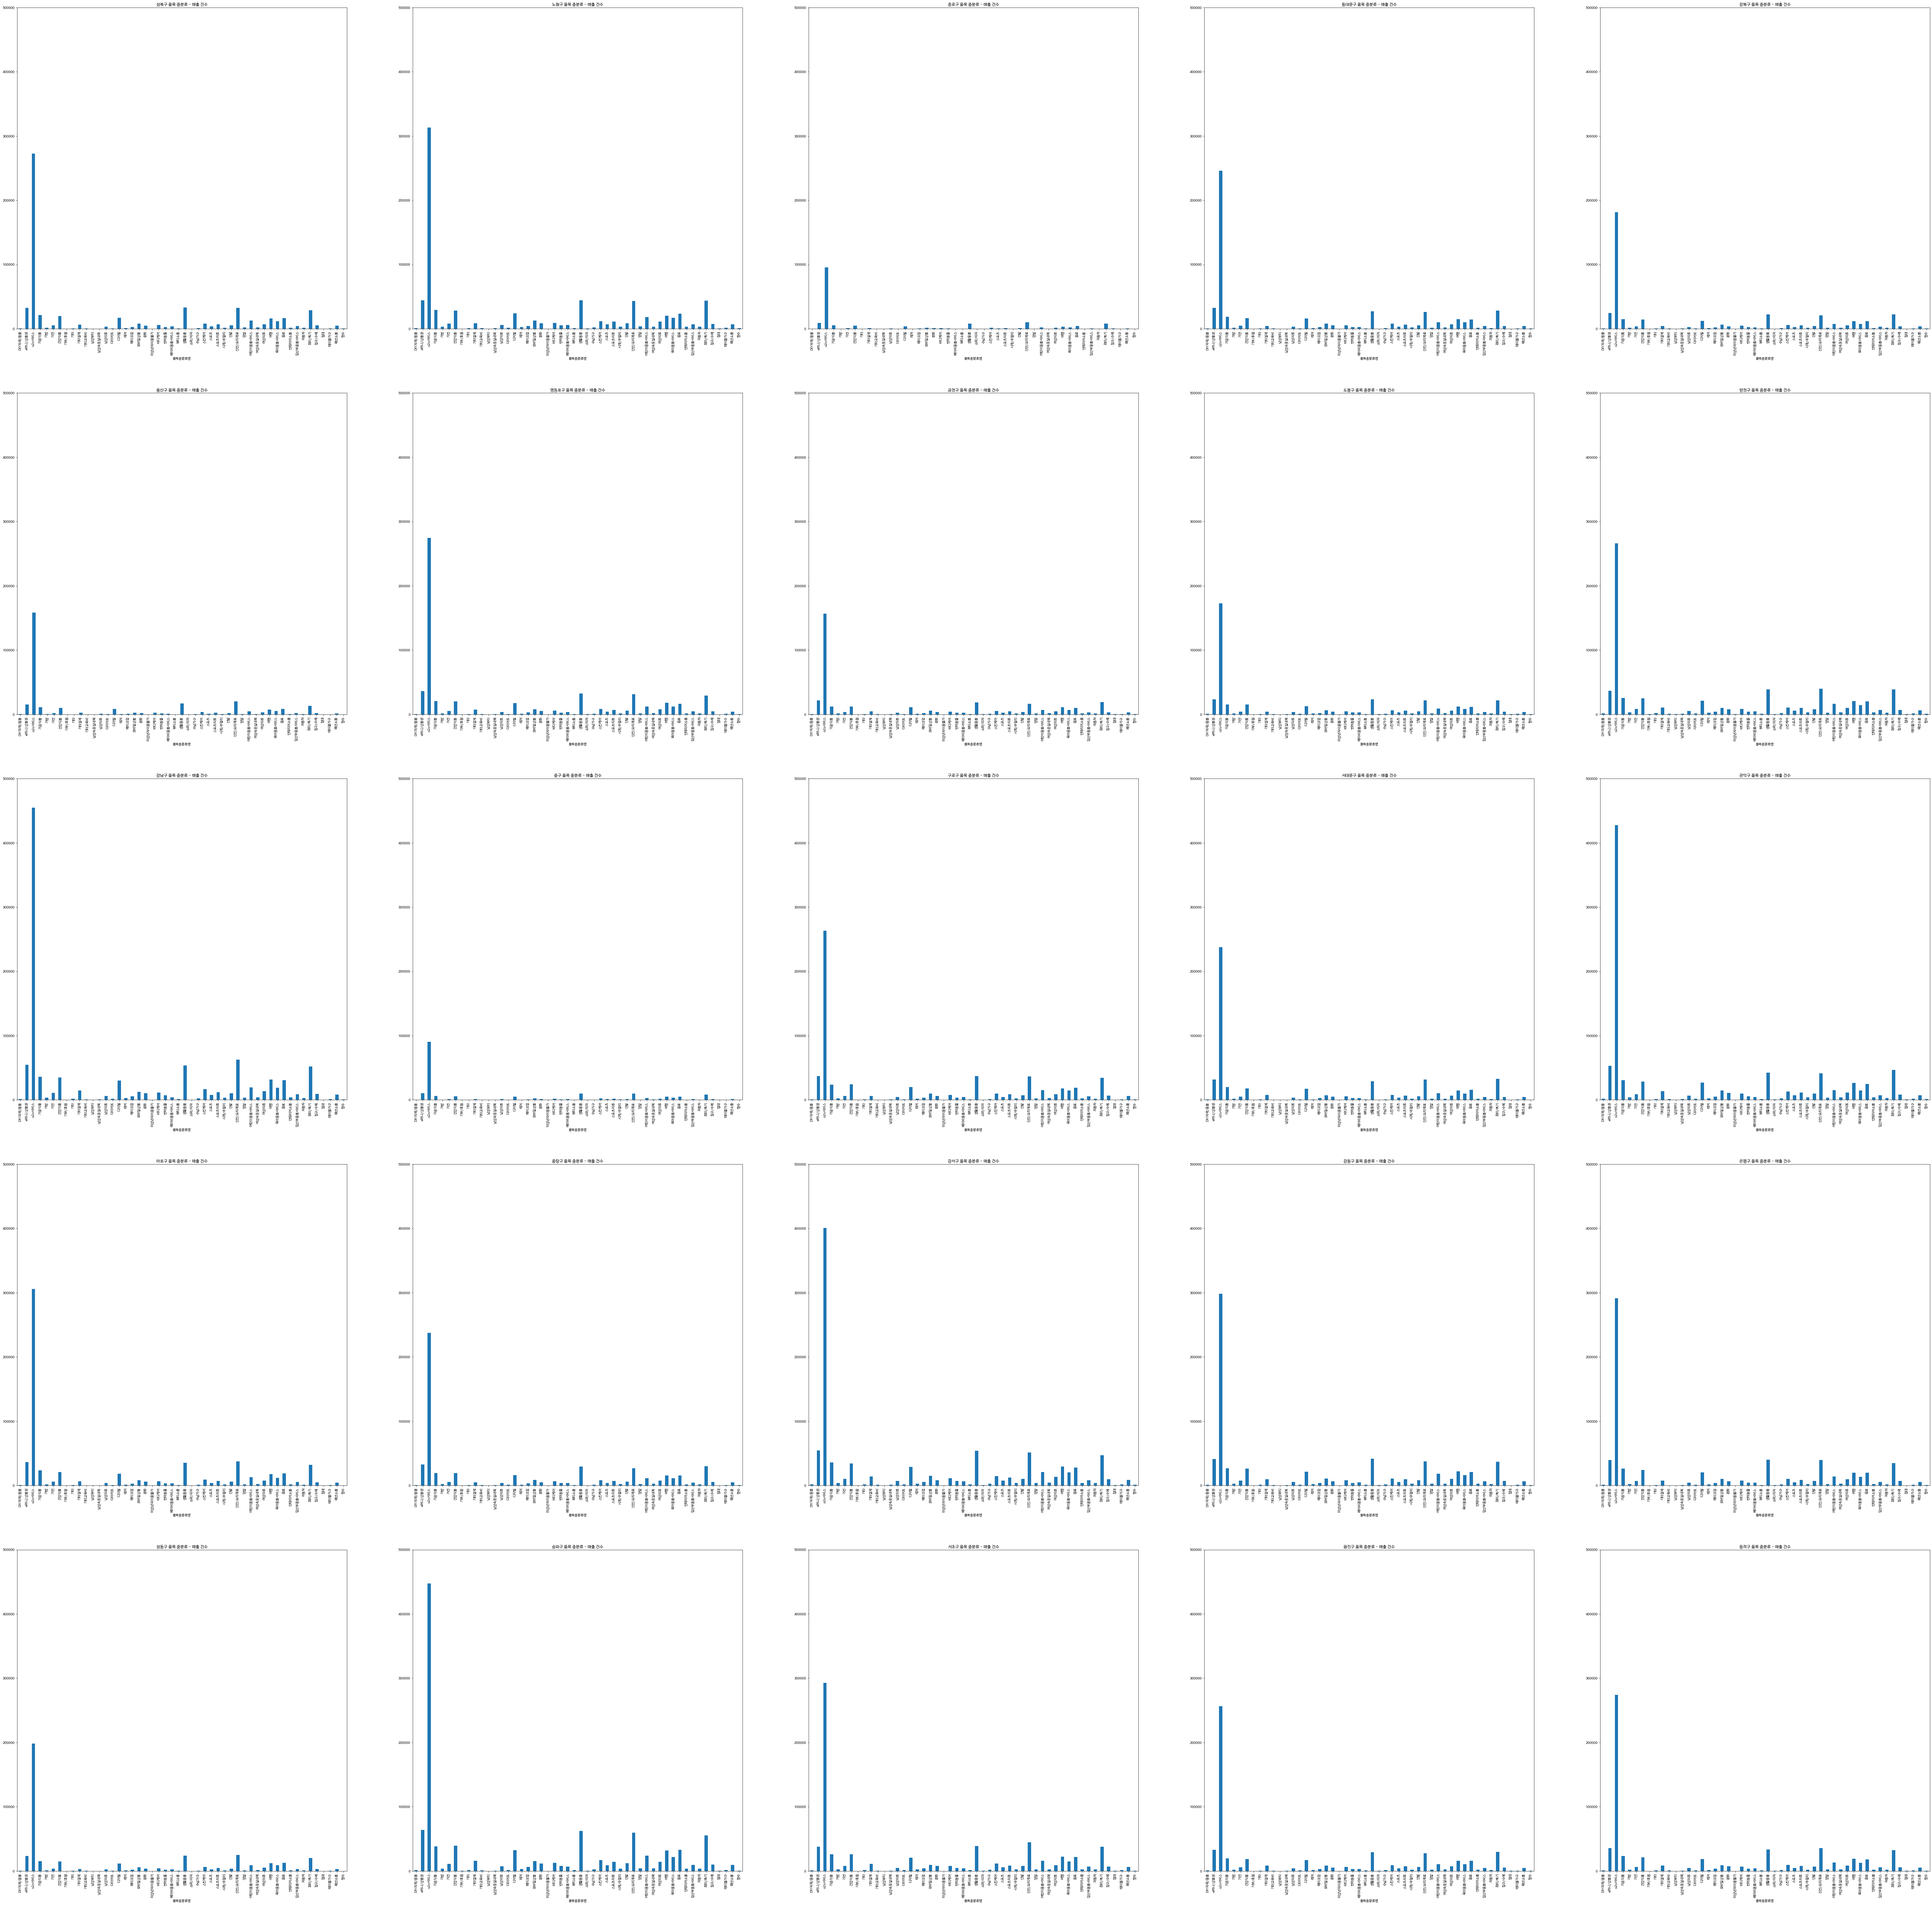

In [25]:
# 지역별 중품목 분류 - 매출 건수

plt.figure(figsize=(100,100))
for i in range(len(sigoongu)):
    plt.subplot(5, 5, i+1)
    plt.ylim([0, 500000])
    counties[i].groupby('품목중분류명')['매출건수'].sum().plot.bar()
    plt.title(sigoongu[i]+ ' 품목 중분류 - 매출 건수')

plt.show()